<a href="https://colab.research.google.com/github/pakagronglb/backtest-cointegrated-pairs-trading/blob/main/Cointegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install numpy pandas statsmodels yfinance

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf

In [ ]:
tickers = ['AMAT', 'NXPI']

In [ ]:
df = yf.download(tickers,start='2020-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [ ]:
df

Ticker,AMAT,NXPI
Date,,
2020-01-02,59.224583,118.399155
2020-01-03,58.281940,117.257004
2020-01-06,57.025078,116.427979
2020-01-07,58.672321,117.938606
2020-01-08,58.634239,118.233353
...,...,...
2025-03-17,155.460007,208.802643
2025-03-18,153.509995,206.086014
2025-03-19,154.460007,207.380005


In [ ]:
rolling_window = 252

stock1,stock2 = tickers

In [ ]:
rolling_alpha = [np.nan] * rolling_window
rolling_beta = [np.nan] * rolling_window

In [ ]:
len(df)

1312

In [ ]:
df.iloc[499-252:499]

Ticker,AMAT,NXPI
Date,,
2020-12-23,81.089684,146.397797
2020-12-24,82.344193,146.836441
2020-12-28,81.900269,147.620453
2020-12-29,81.321274,145.511169
2020-12-30,83.936447,148.759064
...,...,...
2021-12-16,142.573105,205.655106
2021-12-17,142.038589,206.372238
2021-12-20,140.930649,205.372009


In [ ]:
for i in range(rolling_window,len(df)):
  past_data = df.iloc[i-rolling_window:i]

  X = past_data[stock1].values
  y = past_data[stock2].values
  X = sm.add_constant(X)

  model = sm.OLS(y,X).fit()
  rolling_alpha.append(model.params[0])
  rolling_beta.append(model.params[1])

In [ ]:
rolling_params = pd.DataFrame({'Rolling Alpha':rolling_alpha,
                               'Rolling Beta':rolling_beta},index=df.index)

In [ ]:
rolling_params

,Rolling Alpha,Rolling Beta
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
...,...,...
2025-03-17,77.969940,0.821987
2025-03-18,78.182285,0.820846
2025-03-19,78.296494,0.820336


In [ ]:
spread = df[stock2] - (rolling_params['Rolling Alpha'] + rolling_params['Rolling Beta'] * df[stock1])

In [ ]:
rolling_mean = spread.rolling(252).mean()
rolling_std = spread.rolling(252).std()
z_score = (spread - rolling_mean) / rolling_std

In [ ]:
spread_data = pd.DataFrame({'spread':spread,
                            'rolling mean': rolling_mean,
                            'rolling std': rolling_std,
                            'z-score': z_score},
                            index=df.index)

<Axes: xlabel='Date'>

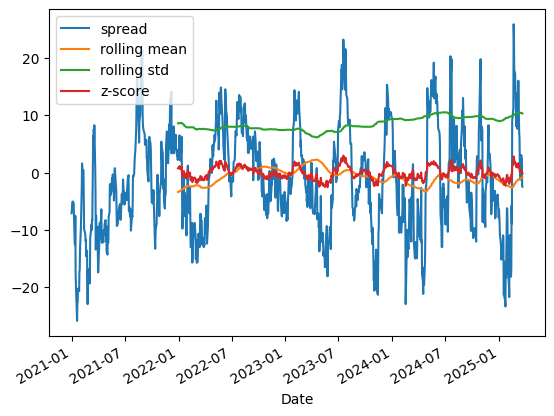

In [ ]:
spread_data.plot()